## Question 1

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
CNN_model=Sequential()
CNN_model.add(Input(shape=(128,128,1)))
CNN_model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='same'))
CNN_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
CNN_model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same'))
CNN_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(256))
CNN_model.add(Dense(10))

In [2]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8

## Question 2

### Loading the classes

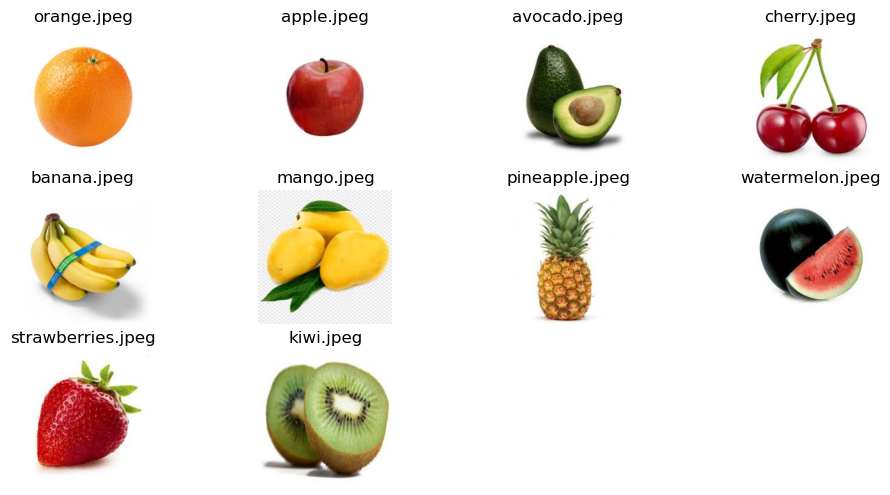

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/MY_data/inf'
image=[]
fruit=[]
for j in os.listdir(path):
    if j.split('.')[-1]=='jpeg':
        img=cv2.imread(os.path.join(path,j))
        img=cv2.resize(img,(200,200))
        image.append(img)
        fruit.append(j)
plt.figure(figsize=(12,8))
c=1
for i in range(0,len(image)):
    plt.subplot(4,4,c)                                    
    plt.imshow(np.array(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB)))
    plt.title(fruit[i])
    plt.axis('off')
    c+=1

### Loading the Training dataset

In [4]:
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/MY_data/train'
classes={'Apple':0,'avocado':1,'Banana':2,'cherry':3,'kiwi':4,'mango':5,'orange':6,'pinenapple':7,'strawberries':8,'watermelon':9}
X_train=[]
Y_train=[]
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpeg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_train.append(img)
            Y_train.append(classes[cls])

### Loading the Validation dataset

In [9]:
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/MY_data/test'
classes={'Apple':0,'avocado':1,'Banana':2,'cherry':3,'kiwi':4,'mango':5,'orange':6,'pinenapple':7,'stawberries':8,'watermelon':9}
X_val=[]
Y_val=[]
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpeg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_val.append(img)
            Y_val.append(classes[cls])

### Loading the testing dataset

In [10]:
path = '/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/MY_data/predict'
X_test= []
for j in os.listdir(pth):
    if j.split('.')[-1]=='jpeg':
        img = cv2.imread(os.path.join(pth, j))
        img = cv2.resize(img, (200, 200))
        X_test.append(img)

### Preprocessing 

In [11]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_test=np.array(X_test)
X_train = X_train.reshape(X_train.shape[0], 200, 200, 3)
X_val = X_val.reshape(X_val.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)
X_train=X_train.astype('float32')
X_val=X_val.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_val/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
Y_train,Y_val= to_categorical(Y_train),to_categorical(Y_val)

### Custom CNN

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input, BatchNormalization, Dropout, RandomFlip, RandomRotation, RandomZoom
model = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])

model.add(Input(shape=(200,200,3)))
model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 200, 200, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 200, 200, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 200, 200, 3)       0         
                                                                 
 input_7 (InputLayer)        multiple                  0         
                                                                 
 conv2d_11 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 100, 100, 32)      0         
 ng2D)                                                

In [23]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [24]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
72/72 [==============================] - 29s 404ms/step - loss: 3.2991 - accuracy: 0.1183 - val_loss: 2.8847 - val_accuracy: 0.0995
Epoch 2/10
72/72 [==============================] - 29s 400ms/step - loss: 2.3116 - accuracy: 0.1000 - val_loss: 3.4946 - val_accuracy: 0.1122
Epoch 3/10
72/72 [==============================] - 29s 401ms/step - loss: 2.3037 - accuracy: 0.0979 - val_loss: 3.7332 - val_accuracy: 0.1102
Epoch 4/10
72/72 [==============================] - 29s 406ms/step - loss: 2.3029 - accuracy: 0.0961 - val_loss: 3.1709 - val_accuracy: 0.0976
Epoch 5/10
72/72 [==============================] - 29s 406ms/step - loss: 2.3029 - accuracy: 0.0918 - val_loss: 2.6016 - val_accuracy: 0.0790
Epoch 6/10
72/72 [==============================] - 29s 408ms/step - loss: 2.3030 - accuracy: 0.1009 - val_loss: 2.3959 - val_accuracy: 0.1161
Epoch 7/10
72/72 [==============================] - 29s 406ms/step - loss: 2.3027 - accuracy: 0.1027 - val_loss: 2.3201 - val_accuracy: 0.1015

### VGG16

In [25]:
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(200,200,3), include_top=False, weights='imagenet')

In [26]:
for layer in model_vgg16.layers:
   layer.trainable=False
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [27]:
model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])
model1.add(model_vgg16)
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(10, activation='softmax'))

In [28]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 200, 200, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 200, 200, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 200, 200, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 18432)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1179712   
                                                      

In [29]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
history1=model1.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
72/72 [==============================] - 198s 3s/step - loss: 2.2691 - accuracy: 0.1644 - val_loss: 2.0616 - val_accuracy: 0.2859
Epoch 2/10
72/72 [==============================] - 200s 3s/step - loss: 1.9292 - accuracy: 0.3023 - val_loss: 1.5639 - val_accuracy: 0.4605
Epoch 3/10
72/72 [==============================] - 197s 3s/step - loss: 1.7481 - accuracy: 0.3693 - val_loss: 1.5040 - val_accuracy: 0.4985
Epoch 4/10
72/72 [==============================] - 195s 3s/step - loss: 1.5643 - accuracy: 0.4328 - val_loss: 1.4227 - val_accuracy: 0.5317
Epoch 5/10
72/72 [==============================] - 195s 3s/step - loss: 1.5832 - accuracy: 0.4337 - val_loss: 1.3336 - val_accuracy: 0.5620
Epoch 6/10
72/72 [==============================] - 200s 3s/step - loss: 1.4445 - accuracy: 0.4759 - val_loss: 1.2950 - val_accuracy: 0.5512
Epoch 7/10
72/72 [==============================] - 197s 3s/step - loss: 1.4007 - accuracy: 0.5037 - val_loss: 1.1486 - val_accuracy: 0.6000
Epoch 8/10
72

### Model Comparision: Accuracy

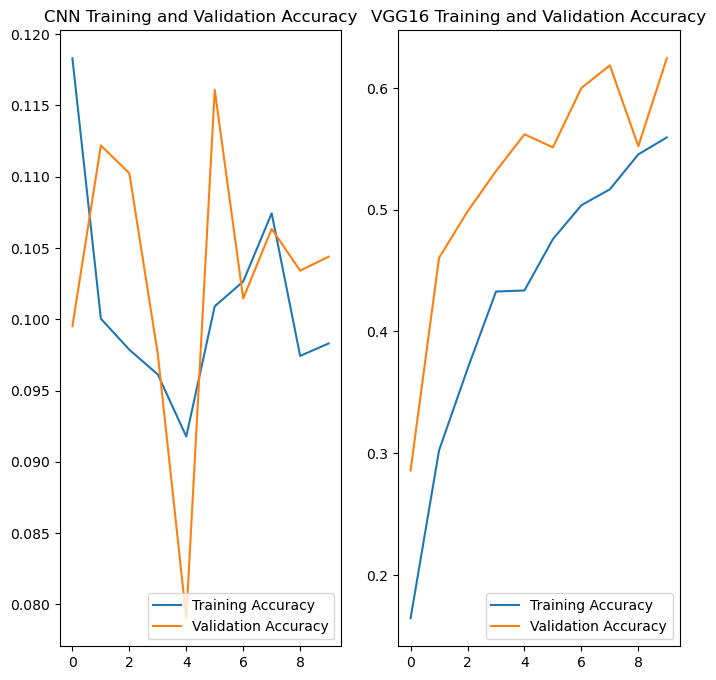

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('VGG16 Training and Validation Accuracy')
plt.show()

### Model Comparison: Loss

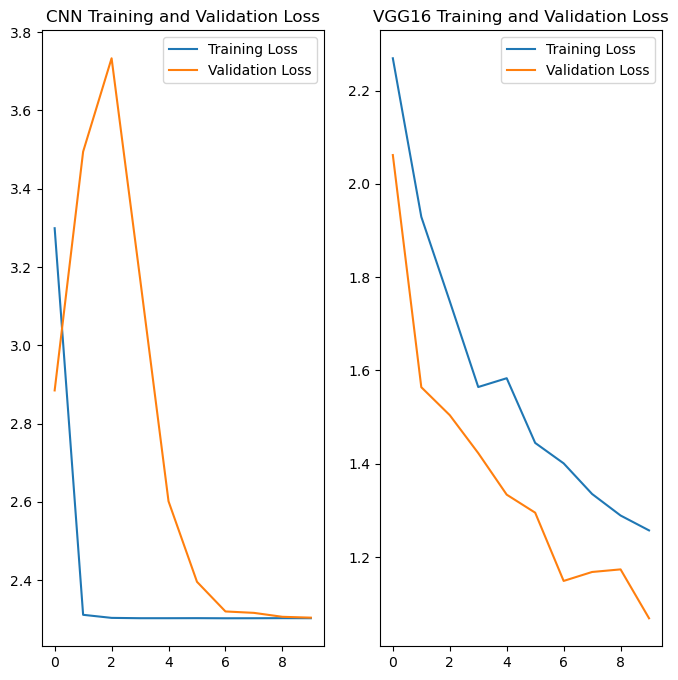

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('VGG16 Training and Validation Loss')
plt.show()

### Predictions

1/1 [==============================] - 0s 84ms/step
According to custom-CNN this is Kiwi 
According to VGG16 this is Watermelon 


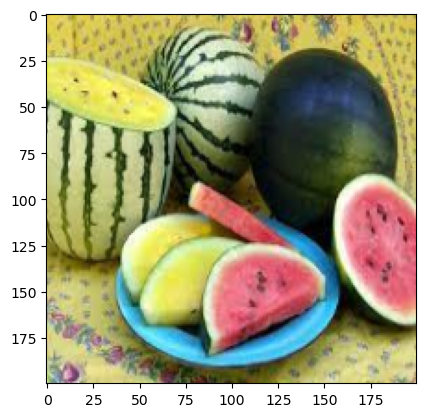

In [44]:
import tensorflow as tf
import random
class_names=['Apple','Avocado','Banana','Cherry','Kiwi','Mango','Orange','Pineapple','Strawberry','Watermelon']
number=random.randint(0,X_test.shape[0])
img_array=np.expand_dims(X_test[number], axis=0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions1 = model1.predict(img_array)
score1 = tf.nn.softmax(predictions1[0])
plt.imshow(np.array(cv2.cvtColor(X_test[number],cv2.COLOR_BGR2RGB)))
print(
    "According to custom-CNN this is {} "
    .format(class_names[np.argmax(score)]))
print(
    "According to VGG16 this is {} "
    .format(class_names[np.argmax(score1)]))

### Confusion Matrix

In [39]:
y_pred = model.predict(X_val)
y_pred1=model1.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes1=np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix1 = confusion_matrix(y_true, y_pred_classes1)
print('Custom CNN:\n',conf_matrix)
print('VGG16:\n',conf_matrix1)

33/33 [==============================] - 60s 2s/step
Custom CNN:
 [[  0   0   0   0  88   0   1   0   0   0]
 [  0   0   0   0 104   0   0   0   1   0]
 [  0   0   0   0 106   0   0   0   0   0]
 [  0   0   0   0 104   0   0   0   1   0]
 [  0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0  95   0   1   0   1   0]
 [  0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0 102   0   0   0   1   0]
 [  0   0   0   0 105   0   0   0   0   0]]
VGG16:
 [[77  1  0  4  0  6  0  0  0  1]
 [ 6 42  1  2 42  4  0  0  0  8]
 [ 1  0 74  0  1  7 18  0  0  5]
 [11  2  1 68  0  0  0  0 14  9]
 [ 2  2  0  0 90  6  5  0  0  0]
 [10  9  0  0 11 55 14  2  0  4]
 [ 1  2  4  1  6 31 50  1  0  1]
 [ 0  2  1  2  0  5  3 91  0  1]
 [ 0  0  0 48  1  0  0  0 51  3]
 [13  7  2 36  1  0  1  1  2 42]]


### Classification Report

In [45]:
from sklearn.metrics import classification_report
print('Custom CNN:\n',classification_report(y_true, y_pred_classes,zero_division=0))
print('VGG16:\n',classification_report(y_true, y_pred_classes1,zero_division=0))

Custom CNN:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00       106
           3       0.00      0.00      0.00       105
           4       0.10      1.00      0.19       105
           5       0.00      0.00      0.00       105
           6       0.50      0.01      0.02        97
           7       0.00      0.00      0.00       105
           8       0.25      0.01      0.02       103
           9       0.00      0.00      0.00       105

    accuracy                           0.10      1025
   macro avg       0.09      0.10      0.02      1025
weighted avg       0.08      0.10      0.02      1025

VGG16:
               precision    recall  f1-score   support

           0       0.64      0.87      0.73        89
           1       0.63      0.40      0.49       105
           2       0.89      0.70      0.78       106
   